In [163]:
from dataclasses import dataclass, field
import math
import matplotlib.pyplot as plt

In [164]:
@dataclass
class Conjunto:
    amostras: list[int]
    numero_de_classes: int
    maior_numero: int = field(init = False)
    menor_numero: int = field(init = False)
    amplitute_total: int = field(init = False)
    largura_da_classe: int = field(init = False)
    limite_inferior: list[int] = field(init = False)
    limite_superior: list[int] = field(init = False)
    frequencia: list[list[int]] = field(init = False)

    def __post_init__(self):
        self.maior_numero = max(self.amostras)
        self.menor_numero = min(self.amostras)
        self.amplitute_total = self.maior_numero - self.menor_numero
        self.largura_da_classe = math.ceil(self.amplitute_total / self.numero_de_classes)

        self.limite_inferior = [self.menor_numero]
        for i in range(1, self.numero_de_classes):
            self.limite_inferior.append(self.limite_inferior[i - 1] + self.largura_da_classe)

        self.limite_superior = [n + (self.largura_da_classe - 1) for n in self.limite_inferior]

        self.frequencia = [[] for _ in range(self.numero_de_classes)]
        amostras_crescente = self.amostras
        amostras_crescente.sort()
        for n_conjunto in amostras_crescente:
            for i in range(self.numero_de_classes):
                if(self.limite_inferior[i] <= n_conjunto and n_conjunto <= self.limite_superior[i]):
                    self.frequencia[i].append(n_conjunto)
                    break

    def histogramaFrequenciaPoligonoFrequencia(self):
        grupos = [f'{intervalo} a {intervalo + self.largura_da_classe}' for intervalo in self.limite_inferior]
        valores = [len(list) for list in self.frequencia]

        plt.figure(figsize = (6, 4))
        plt.bar(grupos, valores)
        plt.plot(grupos, valores, 'k-o')
        plt.show()

    def histogramaFrequenciaRelativa(self):
        grupos = [f'{intervalo} a {intervalo + self.largura_da_classe}' for intervalo in self.limite_inferior]
        valores = [len(list) / len(self.amostras) for list in self.frequencia]

        plt.figure(figsize = (6, 4))
        plt.bar(grupos, valores)
        plt.show()

    def ogiva(self):
        grupos = [f'{intervalo} a {intervalo + self.largura_da_classe}' for intervalo in self.limite_inferior]
        valores = [len(list) for list in self.frequencia]
        for i in range(1, self.numero_de_classes):
            valores[i] = valores[i] + valores[i - 1]

        plt.figure(figsize = (6, 4))
        plt.plot(grupos, valores, 'k-o')
        plt.show()

In [165]:
amostras1 = [108, 139, 120, 123, 120, 132, 123, 131, 131, 157, 150, 124, 111, 101, 135, 119, 116, 117, 127, 128, 139, 119, 118, 114, 127]

conjunto1 = Conjunto(amostras1, 5)

print(conjunto1.largura_da_classe)
print(conjunto1.limite_inferior)
print(conjunto1.limite_superior)
print(conjunto1.frequencia)

12
[101, 113, 125, 137, 149]
[112, 124, 136, 148, 160]
[[101, 108, 111], [114, 116, 117, 118, 119, 119, 120, 120, 123, 123, 124], [127, 127, 128, 131, 131, 132, 135], [139, 139], [150, 157]]


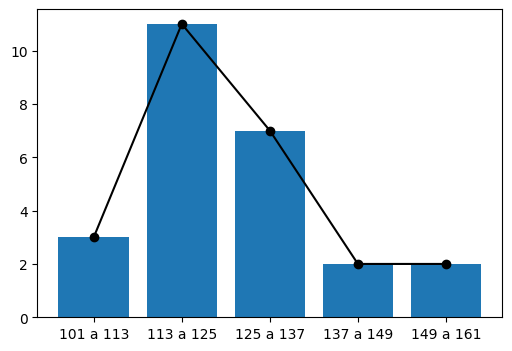

In [166]:
conjunto1.histogramaFrequenciaPoligonoFrequencia()

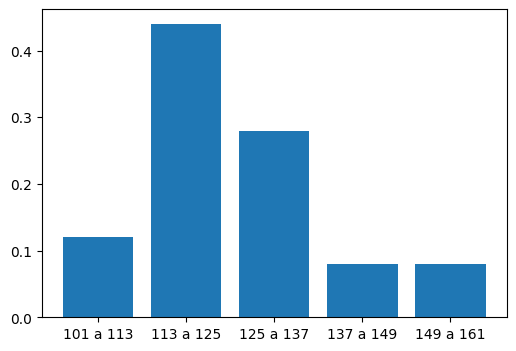

In [167]:
conjunto1.histogramaFrequenciaRelativa()

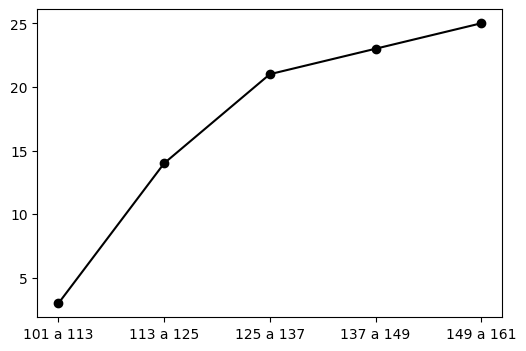

In [168]:
conjunto1.ogiva()

In [169]:
amostras2 = [121, 148, 94, 142, 170, 88, 221, 106, 186, 85, 18, 106, 67, 149, 28, 60, 101, 134, 139, 168, 92, 154, 53, 66]

conjunto2 = Conjunto(amostras2, 5)

print(conjunto2.largura_da_classe)
print(conjunto2.limite_inferior)
print(conjunto2.limite_superior)
print(conjunto2.frequencia)

41
[18, 59, 100, 141, 182]
[58, 99, 140, 181, 222]
[[18, 28, 53], [60, 66, 67, 85, 88, 92, 94], [101, 106, 106, 121, 134, 139], [142, 148, 149, 154, 168, 170], [186, 221]]


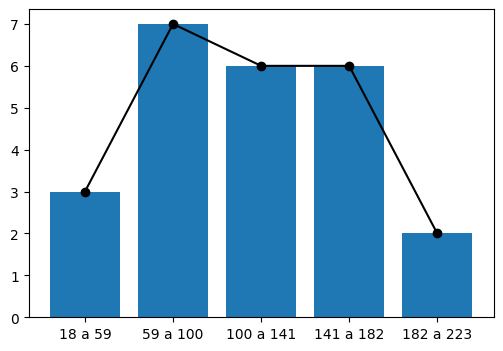

In [170]:
conjunto2.histogramaFrequenciaPoligonoFrequencia()

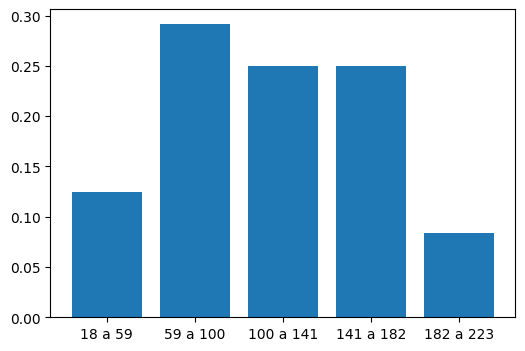

In [171]:
conjunto2.histogramaFrequenciaRelativa()

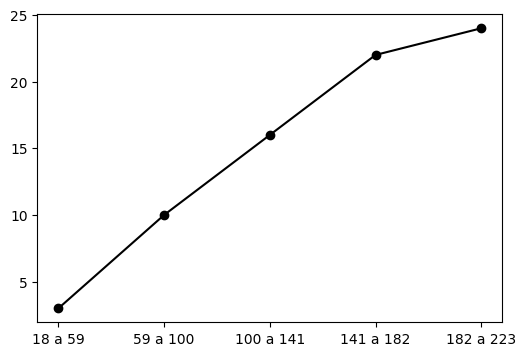

In [172]:
conjunto2.ogiva()